# Explore and Visualize the Data

In [125]:
!pip install tqdm

    100% |████████████████████████████████| 51kB 2.9MB/s ta 0:00:011


In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [126]:
from pprint import pprint
from tqdm import tqdm

In [3]:
pwd

'/home/jovyan/madelon/ipynb'

In [4]:
madelon_test_10 = pd.read_pickle('../assets/madelon_test_10.p')
madelon_train_10 = pd.read_pickle('../assets/madelon_train_10.p')
madelon_train_label10 = pd.read_pickle('../assets/madelon_train_label10.p')
madelon_valid_10= pd.read_pickle('../assets/madelon_valid10.p')

In [5]:
cook_sample = pd.read_pickle('../assets/cook_sample.p')

### Examine and 'clean' the Data

### Madelon Dataset

In [6]:
madelon_test_10.shape
madelon_test_10.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
954,486,518,497,493,558,477,481,476,503,487,...,487,495,584,518,600,486,481,539,483,NaN
1557,483,476,445,487,586,483,563,475,499,478,...,485,460,437,513,517,470,498,533,549,NaN
894,478,517,527,479,497,476,450,477,502,465,...,485,451,640,427,519,478,515,526,500,NaN
905,486,429,541,471,467,471,517,477,500,475,...,477,493,457,504,471,478,458,421,499,NaN
1448,481,519,528,473,525,486,378,476,477,476,...,479,567,483,469,572,486,501,555,502,NaN


Would need to impute the 500 column with the predicted values of -1 or 1 after the classification model is complete and the madelon_test_10 set is passed in to generate predictions.

In [7]:
madelon_train_10.head(5)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
388,477,466,531,486,459,484,506,477,491,494,...,454,476,490,410,533,498,477,481,524,483
414,483,503,549,485,524,487,434,479,497,470,...,481,481,493,685,502,447,484,473,527,509
710,479,489,473,477,483,473,404,474,493,478,...,485,483,498,326,475,507,490,474,504,467
1165,483,491,471,485,494,474,490,477,470,479,...,493,476,464,281,527,487,491,468,467,485
1743,477,442,559,481,529,484,496,478,495,469,...,467,474,513,539,516,490,475,492,513,510


In [8]:
madelon_train_label10.head(5)

388     1
414    -1
710     1
1165    1
1743   -1
Name: target, dtype: int64

In [9]:
madelon_valid_10.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
149,487,494,576,490,462,484,418,476,481,474,...,473,466,587,565,546,470,468,473,477,NaN
539,489,466,509,482,490,476,382,476,495,468,...,483,452,379,443,549,480,474,458,507,NaN
202,487,451,452,490,553,475,511,477,475,485,...,480,480,368,503,491,476,490,515,513,NaN
456,475,493,502,485,517,485,422,477,463,479,...,484,487,634,602,562,481,474,443,477,NaN
595,493,458,503,478,517,479,472,478,444,477,...,475,485,443,517,486,474,489,506,506,NaN


**Madelon datasets to go back and predict -1, 1 on:**
- madelon_valid_10
- madelon_test_10

In [10]:
def drop_last_column_permanent (dataframe):
    last_column_index = dataframe.shape[1]-1
    df = dataframe.drop(last_column_index, axis=1, inplace=True)
    return df

In [11]:
drop_last_column_permanent(madelon_test_10)

In [14]:
madelon_test_10.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1086,489,483,499,491,462,472,447,479,457,496,...,477,478,534,457,486,506,488,490,518,465
410,492,488,518,474,463,469,503,481,489,474,...,496,481,458,330,523,562,484,465,576,453
127,479,536,501,488,431,481,485,475,499,479,...,478,479,485,357,513,535,489,486,475,524
844,493,490,455,474,550,477,419,475,496,479,...,467,479,514,572,523,517,465,477,510,516
1590,473,448,543,479,458,481,469,476,473,473,...,491,477,488,588,459,526,480,503,615,482


In [12]:
drop_last_column_permanent(madelon_valid_10)

In [15]:
madelon_valid_10.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
149,487,494,576,490,462,484,418,476,481,474,...,488,473,466,587,565,546,470,468,473,477
539,489,466,509,482,490,476,382,476,495,468,...,459,483,452,379,443,549,480,474,458,507
202,487,451,452,490,553,475,511,477,475,485,...,511,480,480,368,503,491,476,490,515,513
456,475,493,502,485,517,485,422,477,463,479,...,490,484,487,634,602,562,481,474,443,477
595,493,458,503,478,517,479,472,478,444,477,...,469,475,485,443,517,486,474,489,506,506


### Cook Sample Data Set

This was taken from Josh Cook's database where Josh Cook used sklearn's make_classification to generate 220,000 samples and 1,000 features. It is unknown how many features are informative, redundant, or noise.

In [16]:
cook_sample.shape

(440, 1002)

In [17]:
cook_sample.head()

,_id,feat_000,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,...,feat_991,feat_992,feat_993,feat_994,feat_995,feat_996,feat_997,feat_998,feat_999,target
0,130288,-1.558938,0.559621,0.934527,0.192429,0.130179,-0.125496,0.133544,0.196655,-0.090318,...,-0.660494,-0.820007,-0.242569,-0.459709,-0.063038,0.621087,0.551693,0.124573,1.623202,0
1,130289,-0.368301,0.842603,-0.334257,0.397181,1.552486,0.405636,0.646928,0.603076,0.199934,...,1.263449,-1.323903,1.215217,1.482974,1.071561,1.089850,-0.658328,-0.258123,-0.021302,0
2,130290,-1.250626,0.585656,1.212785,-0.068488,-0.841297,-1.296333,1.240742,-0.164829,-0.782004,...,-0.035905,-0.435833,-2.916269,1.370320,0.032917,0.369725,-1.793411,0.822090,0.545751,1
3,130291,-0.396239,0.795522,-0.827189,-0.936580,-0.323504,-0.707880,0.525449,-0.761152,-0.735070,...,1.227725,0.086881,-0.668349,1.896989,0.138205,1.990027,-0.026086,-0.181649,-0.127934,0
4,130292,-0.010238,-0.656922,0.387079,-1.201123,-1.597871,-0.077609,0.358021,-0.906993,0.571607,...,-1.931700,-0.843277,-0.819254,-2.191828,-1.119522,-0.194287,0.572806,0.173104,-0.140039,1


In [18]:
# extract the target from the sample
# extract the id from the sample

cook_target = cook_sample.iloc[:, -1]
cook_features = cook_sample.iloc[:, 1:-1]

In [19]:
display(cook_target.shape)
display(cook_features.shape)

(440,)

(440, 1000)

### Explore and Visualize Some Features

- I'm only going to visualize and explore the features from both the Madelon dataset and from the Cook sample. The Madelon data set has 500 features, and the Cook sample has 1000 features (excluding the target and the id number). 
- Since there are 500 features in the Madelon dataset and 1,000 features in the Cook dataset, I randomly sampled 10% from each dataset to visualize instead of visualizing all 500 and 1,000 from each of the respective datasets.

#### Sample the features from each of the respective datasets

In [20]:
madelon_sampled_cols = madelon_train_10.sample(50, axis=1)
madelon_sampled_cols.sample(5)

,424,406,430,47,336,166,71,183,344,470,...,204,434,179,227,49,291,239,324,245,414
1873,484,463,521,543,274,476,481,509,477,529,...,514,477,492,479,518,519,482,497,484,504
583,487,465,440,465,383,478,470,468,477,502,...,521,493,500,478,497,432,479,454,519,507
279,484,518,513,473,459,476,488,449,490,504,...,463,481,409,476,427,500,469,460,528,532
873,491,475,508,504,631,476,512,478,479,485,...,511,494,545,481,435,482,480,473,507,492
1618,495,416,490,467,539,477,501,461,451,455,...,492,500,572,481,528,558,485,482,504,514


In [21]:
cook_sampled_cols = cook_features.sample(100, axis=1)
cook_sampled_cols.sample(5)

,feat_911,feat_504,feat_410,feat_598,feat_202,feat_073,feat_535,feat_651,feat_138,feat_515,...,feat_600,feat_382,feat_094,feat_839,feat_099,feat_444,feat_836,feat_524,feat_529,feat_650
434,0.997646,1.741890,-0.927011,0.135010,-0.188041,-1.200696,2.137685,-1.178689,-2.158202,0.734591,...,1.145977,-0.928519,-0.673012,0.828538,-0.679670,0.309966,-0.836051,0.196982,0.644140,-1.115358
245,1.259923,1.569223,0.444001,-2.273418,1.361711,-0.762462,-1.411172,-0.159998,0.860485,-0.467471,...,-0.893412,-0.663478,-1.219557,-0.888872,1.293257,0.683706,0.086164,-0.040017,0.130637,-1.545917
314,-1.877736,-0.976544,0.400775,-0.257147,0.261273,-0.981072,0.034829,-0.804274,0.498776,-0.999056,...,1.032263,2.208347,-0.848896,1.667592,-1.024441,-0.977388,-0.519488,0.938411,1.173381,-0.753114
422,0.988285,-0.390125,1.018821,-0.224076,-1.928443,1.605821,-0.477048,-0.496416,-0.510167,-0.896446,...,-0.590482,-0.873696,1.569829,-0.130844,-0.570712,0.137667,0.241143,-0.346684,-1.801462,0.199476
264,0.326076,2.659684,0.114457,-0.221800,-1.315433,0.224221,0.394312,0.364502,-1.680946,1.368917,...,1.657445,0.866456,-0.214579,-0.828395,-1.173162,1.108259,0.140197,0.060279,-0.690845,0.357837


#### Visualize the sampled columns (50 from Madelon, 100 from Cook)

In [22]:
def distplot_df_cols (df):
    '''
    cannot handle a dataframe with more than 100 columns
    '''
    fig = plt.figure(1, figsize=(20,40))
    
    for i in range(len(df.columns)):
        fig.add_subplot(20,5,i+1)
        sns.distplot(df.iloc[i])
        plt.axvline(df[df.columns[i]].mean(), c='red')
        plt.axvline(df[df.columns[i]].median(), c='black')

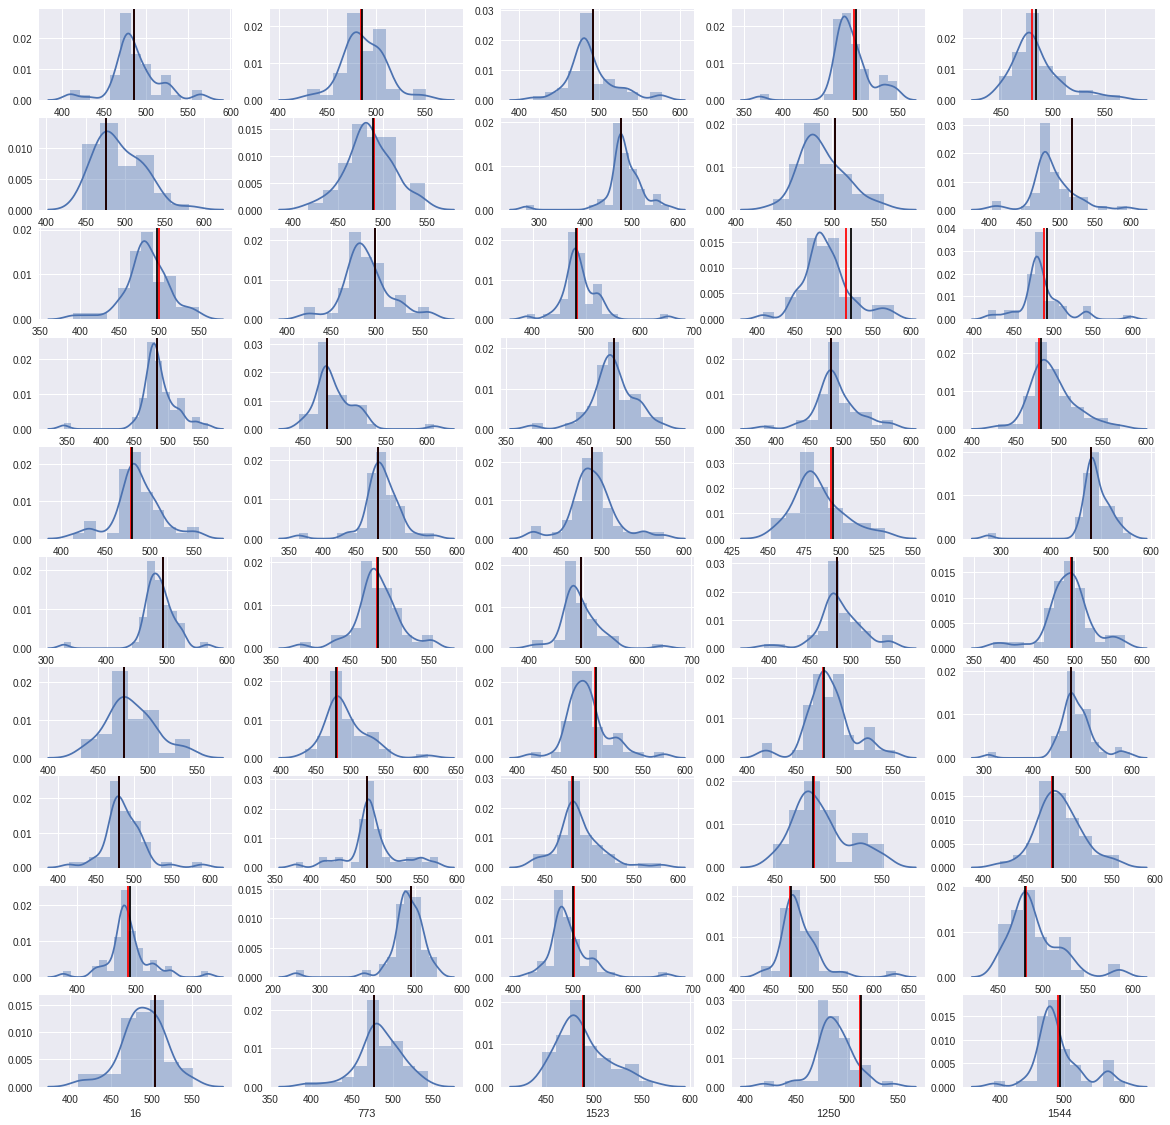

In [23]:
distplot_df_cols(madelon_sampled_cols)

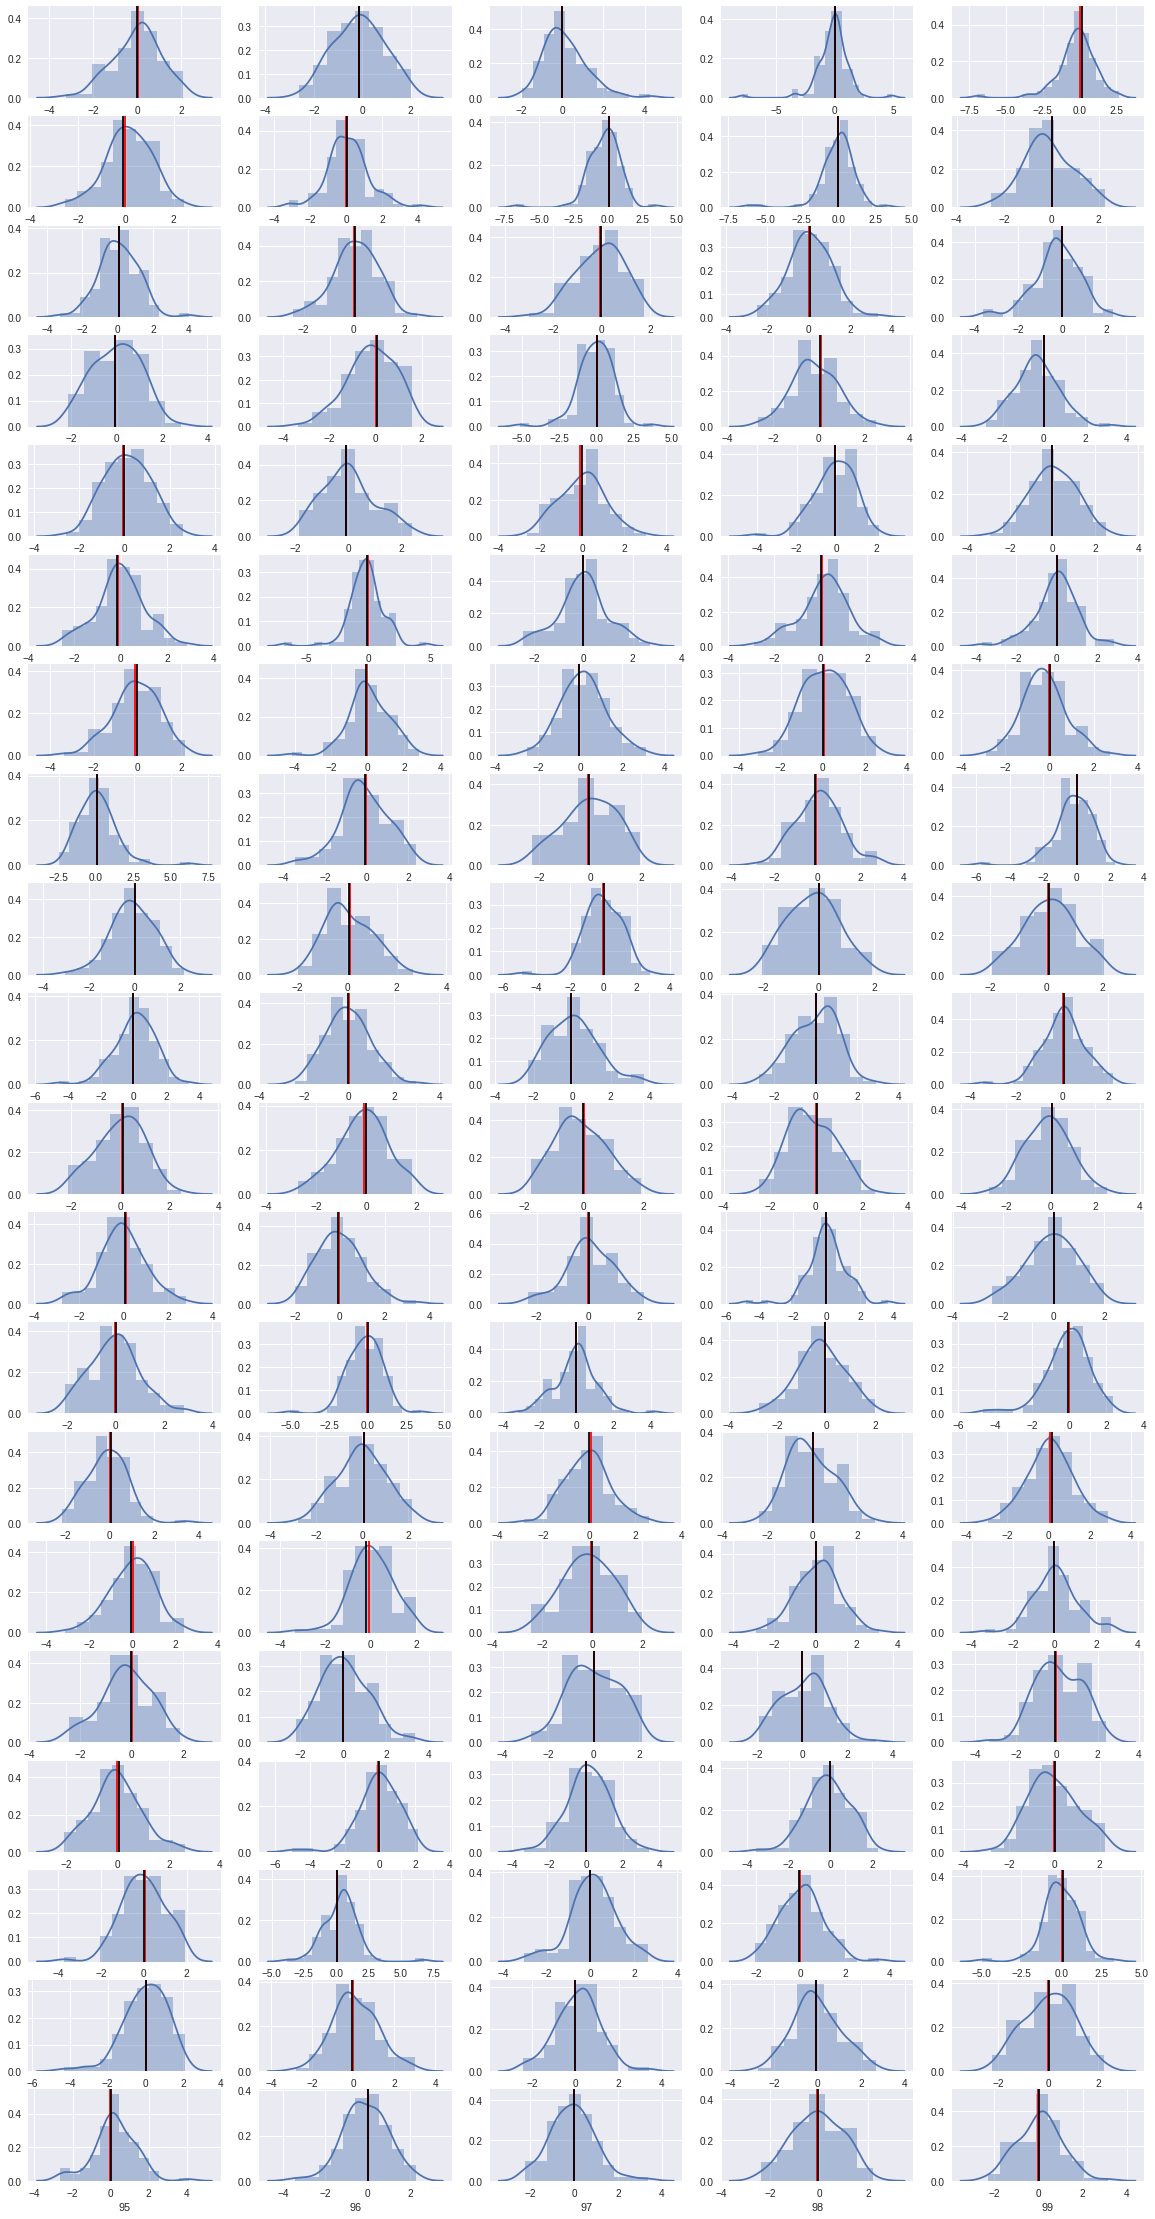

In [24]:
distplot_df_cols(cook_sampled_cols)

#### Observations - BOTH Madelon Dataset and Cook's Make Classification Dataset
* There are features that are skewed (where the mean and the median are not the same)
* There are features that are have bimodal distribution
* There appear to be featuers with outliers as well

**Generate Scatter Plots to look at Feature relationships:**
Notably the features in each of the Madelon and Cook dataset are not linearly separable as evidenced by setting the color code to the two classes for each of the datasets (since both datasets are binary classification problems).

**Madelon Scatter Plots for 5 features**

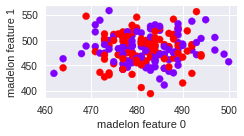

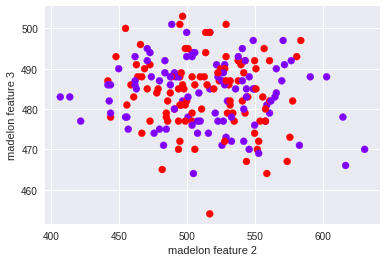

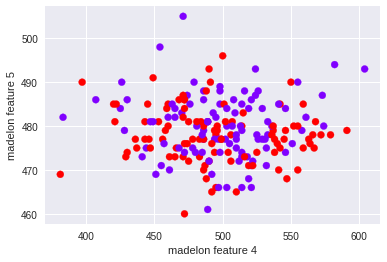

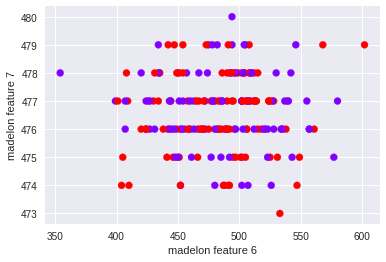

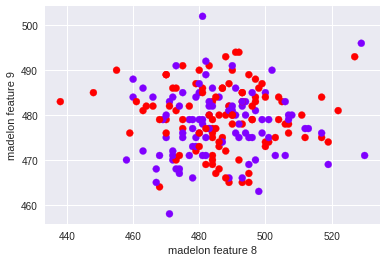

In [30]:
fig = plt.figure(1, figsize=(20,40))

for i in range(0, 10, 2):
    fig.add_subplot(20,5,i+1)
    plt.scatter(madelon_train_10.iloc[:, i], madelon_train_10.iloc[:, i+1], \
                c=madelon_train_label10, cmap='rainbow')
    plt.xlabel('madelon feature {}'.format(madelon_train_10.columns[i]))
    plt.ylabel('madelon feature {}'.format(madelon_train_10.columns[i+1]))
    plt.show()
   

**Cook Scatter Plots for 5 features**

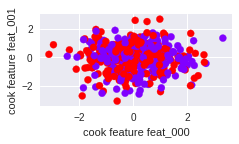

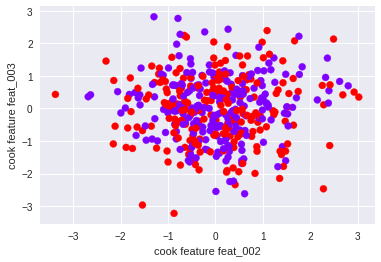

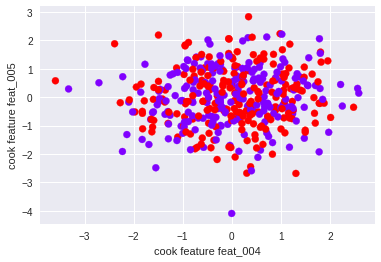

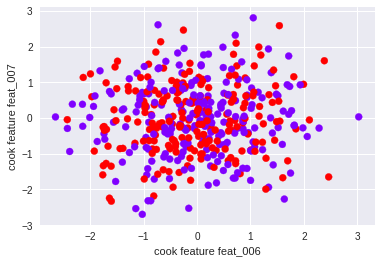

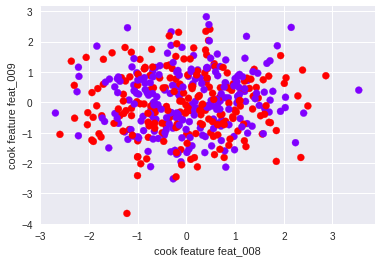

In [191]:
fig = plt.figure(1, figsize=(20,40))

for i in range(0, 10, 2):
    fig.add_subplot(20,5,i+1)
    plt.scatter(cook_features.iloc[:, i], cook_features.iloc[:, i+1], \
                c=cook_target, cmap='rainbow')
    plt.xlabel('cook feature {}'.format(cook_features.columns[i]))
    plt.ylabel('cook feature {}'.format(cook_features.columns[i+1]))
    plt.show()
   

### Unsupervised Learning on the Training Data (without Labels)

#### Method 1: Calculate the R^2 Score to tease out noise
Calculate the R^2 score repeatedly for each of the features to see which of the features are linearly dependent vs. linearly independent. If they are linearly dependent, then they could be one of the (I) informative or (II) redundant features, but certainly not the noise. The noisy features will be linearly indepedent and therefore not return a good R^2 score. 

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

The below function will generate an R^2 score for a target vs. the other features. This function will be used to iterate through all of the 500 features in the Madelon dataset and all 1,000 features in the Cook dataset to help identify which of the features are considered noise vs. not noise. Further, this process will be run several times over because the R^2 score might change with each iteration. Ultimately the mean R^2 score will be calculate for each feature and the mean will drive the decision-making on which of the features are considered noise vs. not noise.

**The two models selected for deriving the R^2 score will be non-linear regression algorithms due to the non-linear nature of the data (as visualized in the cells above):**
1. KNeighbors Regressor
2. DecisionTree Regressor

In [131]:
def calculate_r_2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,data[feature],test_size=0.25
    )

    regressor = KNeighborsRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

Note that each time the R2 score is calcualted for each feature, the R2 score changes.
Therefore, calculate the R2 score multiple times and then obtain the mean to determine which features to keep vs. eliminate.

In [124]:
# test the calculate_r_2_for_feature function by iterating through all 500 columns for the madelon_train_10 dataset

knn_R2_scores = []
for column in madelon_train_10.columns:
    score = calculate_r_2_for_feature(madelon_train_10, column)
    knn_R2_scores.append(score)

In [127]:
def calculate_mean_r_2 (data, feature, iteration=200):
    '''
    iteration default set to 200
    iteration can be specified (type int)
    '''
    scores = []
    for i in range(iteration):
        scores.append(calculate_r_2_for_feature(data, feature))
    
    scores = np.array(scores)
    return scores.mean()

**In the below cell, I printed the column and score to ensure that the averages continued to calculate** (and that my kernel didn't die).

In [129]:
madelon_avg_r2_feature_scores = []

for column in madelon_train_10.columns:
    score = calculate_mean_r_2(madelon_train_10, column)
    madelon_avg_r2_feature_scores.append(score)
    print(column, score)

0 -0.102335999594
1 -0.246639396152
2 -0.334907065835
3 -0.241071844612
4 -0.225162789539
5 -0.212575029383
6 -0.104752889985
7 -0.135356581846
8 -0.23172614018
9 -0.198166835927
10 -0.2308824438
11 -0.150289368195
12 -0.280174738613
13 -0.19002142381
14 -0.24595599348
15 -0.253899751386
16 -0.155409922507
17 -0.170521780631
18 -0.173967997581
19 -0.198174013115
20 -0.274280369856
21 -0.311503563647
22 -0.245569878156
23 -0.299022944959
24 -0.29113997978
25 -0.209113952386
26 -0.218024579398
27 -0.195552809382
28 0.468721324616
29 -0.251176609083
30 -0.154672054864
31 -0.243764849792
32 -0.226027738856
33 -0.156287477545
34 -0.208521160284
35 -0.0448087100299
36 -0.296001965284
37 -0.151564229292
38 -0.242269381052
39 -0.233569454129
40 -0.131156650529
41 -0.282735148803
42 -0.23947674328
43 -0.112682195448
44 -0.163169037225
45 -0.138739776837
46 -0.22583621363
47 -0.164301286991
48 0.354530973317
49 -0.233736234196
50 -0.218437609859
51 -0.220292505106
52 -0.260194136255
53 -0.343399

418 -0.110178748316
419 -0.23263373135
420 -0.267464150618
421 -0.252337754222
422 -0.209138912508
423 -0.204682261863
424 -0.157666490052
425 -0.369616248163
426 -0.119375031084
427 -0.158115043107
428 -0.178683804217
429 -0.323524471546
430 -0.236331780571
431 -0.20137115477
432 -0.250428389911
433 0.792121811632
434 -0.216486037578
435 -0.163551555375
436 -0.190949841174
437 -0.176542219647
438 -0.34353921656
439 -0.257102988319
440 -0.331546160816
441 -0.284782382358
442 0.755647219789
443 -0.211575758159
444 -0.254564209351
445 -0.208246394604
446 -0.326990326463
447 -0.198414080328
448 -0.330676794865
449 -0.180189464418
450 -0.120721684551
451 0.489378892169
452 -0.163745022761
453 0.864565473804
454 -0.301690898736
455 0.850511295837
456 -0.214568069896
457 -0.262604046823
458 -0.167348495406
459 -0.276009380349
460 -0.159225332009
461 -0.195805661692
462 -0.173309201213
463 -0.324799772868
464 -0.263049420457
465 -0.232878497748
466 -0.268003354947
467 -0.335150264905
468 -0.2

In [146]:
madelon_inf_red_feat_indices = [i for i, r2 in enumerate(madelon_avg_r2_feature_scores) if r2 > 0]
madelon_inf_red_feat_indices

[28,
 48,
 64,
 105,
 128,
 153,
 241,
 281,
 318,
 336,
 338,
 378,
 433,
 442,
 451,
 453,
 455,
 472,
 475,
 493]

In [ ]:
cook_avg_r2_feature_scores = []

for column in cook_features.columns:
    score = calculate_mean_r_2(cook_features, column)
    cook_avg_r2_feature_scores.append(score)
    print(column, score)

feat_000 -0.160878585159
feat_001 -0.17152940011
feat_002 -0.15400237833
feat_003 -0.205309977535
feat_004 -0.197468013191
feat_005 -0.237062419623
feat_006 -0.216298457048
feat_007 -0.262008555195
feat_008 -0.16574528973
feat_009 -0.177548298729
feat_010 -0.214188429717
feat_011 -0.219432884489
feat_012 -0.162760451048
feat_013 -0.175034997616
feat_014 -0.220300597963
feat_015 -0.137590779845
feat_016 -0.250359192191
feat_017 -0.194219825308
feat_018 -0.32802209002
feat_019 -0.183264793356
feat_020 -0.209124047475
feat_021 -0.148601249253
feat_022 -0.125325939866
feat_023 -0.260597620069
feat_024 -0.203160667067
feat_025 -0.141482179351
feat_026 -0.186356551042
feat_027 -0.168589134853
feat_028 -0.224849648207
feat_029 -0.229875053311
feat_030 -0.240294873961
feat_031 -0.292241203696
feat_032 -0.115207002826
feat_033 -0.17317888013
feat_034 -0.145801277244
feat_035 -0.176050213574
feat_036 -0.284338856746
feat_037 -0.167903447627
feat_038 -0.195340574816
feat_039 -0.178352916495
feat_

feat_329 -0.184338513149
feat_330 -0.190495321171
feat_331 -0.250520276015
feat_332 -0.113231158044
feat_333 -0.152510815561
feat_334 -0.210182608904
feat_335 -0.206701481882
feat_336 0.677890107235
feat_337 -0.184329655793
feat_338 -0.201643105465
feat_339 -0.212637778751
feat_340 -0.228001910198
feat_341 0.713041882573
feat_342 -0.170525863071
feat_343 -0.133479012768
feat_344 -0.245997572026
feat_345 -0.154736775209
feat_346 -0.221824829485
feat_347 -0.292060714114
feat_348 -0.298154120957
feat_349 -0.205236124787
feat_350 -0.270700057711
feat_351 -0.155022856731
feat_352 -0.246899928562
feat_353 -0.213812152409
feat_354 -0.205338363856
feat_355 -0.202103397998
feat_356 -0.26754111857
feat_357 -0.216875831077
feat_358 -0.328172084742
feat_359 -0.200920301252
feat_360 -0.170707579085
feat_361 -0.216542651595
feat_362 -0.204075241342
feat_363 -0.235234227651
feat_364 -0.200660959871
feat_365 -0.26401645257
feat_366 -0.176271718778
feat_367 -0.259976987386
feat_368 -0.18463573276
feat_

In [142]:
cook_inf_red_feat_indices = [i for i, r2 in enumerate(cook_avg_r2_feature_scores) if r2 > 0]
cook_inf_red_feat_indices

[257,
 269,
 308,
 315,
 336,
 341,
 395,
 504,
 526,
 639,
 681,
 701,
 724,
 736,
 769,
 808,
 829,
 867,
 920,
 956]

#### Method 2: Calculate Pearson Correlation between Features
Generate correlation matrices for each of the datasets to see if this is congruent with the R^2 test findings as to which features are considered: (I) informative, (II) redundant, or (III) noise.

##### Madelon Dataset

In [161]:
madelon_train_corr = madelon_train_10.corr()
madelon_train_corr.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,0.047199,-0.002346,0.105309,-0.020674,0.074801,0.047760,-0.026307,-0.034731,0.123077,...,0.008340,0.060812,-0.001560,-0.022404,0.055359,0.108695,-0.003734,0.019289,0.045468,-0.093386
1,0.047199,1.000000,-0.012000,0.106806,-0.110350,0.106229,-0.071654,-0.060653,0.046008,0.038960,...,0.022742,-0.007649,0.067820,0.115147,-0.107568,0.056485,0.011786,-0.002676,-0.081556,-0.114129
2,-0.002346,-0.012000,1.000000,-0.105794,0.006155,-0.092926,-0.026965,-0.049577,-0.017677,0.035432,...,-0.179903,0.126612,0.101954,0.029292,-0.020281,-0.014383,0.142905,0.084506,-0.017254,0.020917
3,0.105309,0.106806,-0.105794,1.000000,-0.097566,0.026073,0.044099,0.086124,-0.111232,-0.016248,...,0.045127,-0.082899,-0.031425,0.005909,-0.022220,0.055232,-0.041022,-0.012168,0.074158,0.005950
4,-0.020674,-0.110350,0.006155,-0.097566,1.000000,-0.036144,-0.118690,0.062642,-0.049369,-0.052431,...,0.042703,0.055216,-0.061838,-0.037529,-0.065001,0.117918,-0.010232,-0.050575,0.115227,0.116225


In [204]:
# take the sum of each column or each row, and then sort it to see which features have the highest cumulative 
# correlation

madelon_cum_corr = []

for column in madelon_train_corr.columns:
    cum_corr = madelon_train_corr[column].sum()
    madelon_cum_corr.append(cum_corr)

In [216]:
madelon_feat_corr = [(i, cum_corr) for i, cum_corr in enumerate(madelon_cum_corr)]
top20_madelon_feat_corr = sorted(madelon_feat_corr, key=lambda x: x[1], reverse=True)[:20]
sorted(top20_madelon_feat_corr, key=lambda x: x[0])

[(33, 3.7648445368369279),
 (87, 4.0236159540300971),
 (102, 4.2654812703565463),
 (125, 4.4545388296132424),
 (153, 5.7069400919410516),
 (166, 4.1853907569052691),
 (232, 3.8097732277804681),
 (281, 5.7807751397573153),
 (286, 3.6735931585691231),
 (342, 3.941716988208106),
 (370, 4.7892308310296894),
 (391, 4.023174218361202),
 (427, 5.6027306630576277),
 (433, 5.6784293813451994),
 (437, 4.14551703310305),
 (438, 4.012349006161406),
 (446, 4.7798292087857446),
 (460, 3.9268266019456237),
 (493, 3.6666498300913042),
 (495, 3.9651603646695737)]

In [ ]:
 153,
 281,
 433,
 493]


**Note:** the above method does not return the same 20 features as the R2 method of eliminating noise. There are 4 features that are in common, such as:
 - 153,
 - 281,
 - 433, and
 - 493

##### Cook Dataset

In [ ]:
cook_features.corr()

mask = np.zeros_like(cook_features.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(cook_features.corr(), mask=mask, cmap=cmap, annot=True, center=0)
plt.show()